In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
from scipy.interpolate import splrep, BSpline, splev

In [2]:
def average(DATA_AV):
    average = []
    for i in range(len(DATA_AV)):
        average.append(stat.fmean(DATA_AV[i]))
    return np.asarray(average, dtype = np.float32)

In [3]:
def geom_mean(DATA_AV):
    geom_mean = []
    for i in range(len(DATA_AV)):
        geom_mean.append(stat.geometric_mean(DATA_AV[i]))
    return np.asarray(geom_mean, dtype = np.float32)

In [4]:
def harm_mean(DATA_AV):
    harm_mean = []
    for i in range(len(DATA_AV)):
        harm_mean.append(stat.harmonic_mean(DATA_AV[i]))
    return np.asarray(harm_mean, dtype = np.float32)

In [24]:
def spline(good_period, good_data, bilog_scale = True, semilogx_scale = False, lin_scale = False):
    
    h = []
    n = len(good_period)
    for i in range(n - 1):
        h.append(good_period[i + 1] - good_period[i])
   
    a = [0]
    b = [-1]
    c = [0]
    d = [0]
    ksi = [c[0]/b[0]]
    etta = [d[0]/b[0]]
    for i in range(1, n - 1):
        a.append((h[i-1]/6))
        b.append((-(h[i-1] + h[i])/3))
        c.append(h[i]/6)
        d.append((good_data[i+1] - good_data[i])/h[i] - (good_data[i] - good_data[i-1])/h[i-1])
        ksi.append(c[i]/(b[i] - ksi[i-1] * a[i]))
        etta.append((a[i] * etta[i-1] - d[i])/(b[i] - ksi[i-1] * a[i]))
    a.append(0)
    b.append(-1)
    c.append(0)
    d.append(0)
    etta.append((a[n-1] * etta[n-2] - d[n-1])/(b[n-1] - ksi[n-2] * a[n-1]))
    
    m = [etta[n-1]]
    for i in range(1, n):
        m.append(ksi[-i] * m[i-1] + etta[-(i+1)])
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot()
    #ax.plot(good_period, good_data, 'o')
    if bilog_scale == True:
        for i in range(1, n):
            x = np.linspace(good_period[i-1], good_period[i], 50)
            ax.loglog(x, ((m[-i] * (good_period[i] - x)**3 + m[-(i+1)] * (x - good_period[i-1])**3) / 6 + (good_data[i-1] - m[-i] * h[i - 1]**2 / 6) * (good_period[i] - x) + (good_data[i] - m[-(i+1)] * h[i - 1]**2 / 6) * (x - good_period[i-1])) / h[i - 1], color='red')
            ax.grid('True')
            ax.axis('equal')
    elif semilogx_scale == True:
        for i in range(1, n):
            x = np.linspace(good_period[i-1], good_period[i], 50)
            ax.semilogx(x, ((m[-i] * (good_period[i] - x)**3 + m[-(i+1)] * (x - good_period[i-1])**3) / 6 + (good_data[i-1] - m[-i] * h[i - 1]**2 / 6) * (good_period[i] - x) + (good_data[i] - m[-(i+1)] * h[i - 1]**2 / 6) * (x - good_period[i-1])) / h[i - 1], color='red')
            ax.grid('True')
    elif lin_scale == True:
        for i in range(1, n):
            x = np.linspace(good_period[i-1], good_period[i], 50)
            ax.plot(x, ((m[-i] * (good_period[i] - x)**3 + m[-(i+1)] * (x - good_period[i-1])**3) / 6 + (good_data[i-1] - m[-i] * h[i - 1]**2 / 6) * (good_period[i] - x) + (good_data[i] - m[-(i+1)] * h[i - 1]**2 / 6) * (x - good_period[i-1])) / h[i - 1], color='red')
            ax.grid('True')
            ax.axis('equal')
    
    plt.show()

In [6]:
def open_exp_data(file_name, data_name):
    DATA = []
    with open(file_name, 'r') as file:
        if '>FREQ' in data_name:
            for line in file:
                if data_name in line:
                    for line in file:
                        try:
                            DATA += [1/float(value) for value in line.split()]
                        except ValueError: 
                            break
                    break
            DATA_AR = np.asarray(DATA, dtype = np.float32)
        else:
            for line in file:
                if data_name in line:
                    data = []
                    for line in file:
                        try:
                            data += [float(value) for value in line.split()]
                        except ValueError:
                            DATA.append(data)
                            break
            DATA_AR = np.asarray(DATA, dtype = np.float32).transpose() 
            
    return DATA_AR

In [7]:
def big_filtr(DATA, not32 = True, i_ch = False, iii_ch = False):
    rows, clmns = DATA.shape
    good_data = []
    if not32 == True:
        for i in range(rows):
            good_data.append(list(DATA[i][DATA[i] < 1e32]))
    elif i_ch == True:
        for i in range(rows):
            good_data.append(list(DATA[i][(DATA[i] <= 90) & (DATA[i] >= 0)]))
    elif iii_ch == True:
        for i in range(rows):
            good_data.append(list(DATA[i][(DATA[i] <= -90) & (DATA[i] >= -180)]))
        
    return good_data

In [8]:
def filtr_for_impedance(DATA_R, DATA_I):
    rows, clmns = DATA_R.shape
    good_data_r = []
    good_data_i = []
    for i in range(rows):
        good_data_r.append(list(DATA_R[i][(DATA_R[i] < 1e32) & (DATA_I[i] < 1e32)]))
        good_data_i.append(list(DATA_I[i][(DATA_R[i] < 1e32) & (DATA_I[i] < 1e32)]))
    return good_data_r, good_data_i
# булеву маску достаточно сделать по одному, так как пустные множества 
# у них будут совпадать(фильтры одинаковые)

In [9]:
# удаляем пустые множества и делаем булеву маску для модуля тензора импеданса
def bln_mask_nan_imp(DATA_R, DATA_I): 
    bln_msk = []
    MODULE_IMP = []
    for i in range(len(DATA_R)):
        if bool(DATA_R[i]) == 0:
            bln_msk.append(False)
        else:
            bln_msk.append(True)
            module_imp = []
            for j in range(len(DATA_R[i])):
                module_imp.append(np.sqrt(DATA_R[i][j]**2 + DATA_I[i][j]**2))
            MODULE_IMP.append(module_imp)
            
    return bln_msk, MODULE_IMP

In [10]:
def bln_mask_nan(DATA):
    bln_msk = []
    good_data = []
    for i in range(len(DATA)):
        if bool(DATA[i]) == 0:
            bln_msk.append(False)
        else:
            bln_msk.append(True)
            good_data.append(DATA[i])
    return bln_msk, good_data

In [11]:
def open_fin_data(file_name, data_name):
    DATA = []
    with open(file_name, 'r') as file:
            for line in file:
                if data_name in line:
                    for line in file:
                        try:
                            if '>FREQ' in data_name:
                                DATA += [1/float(value) for value in line.split()]
                            else:
                                DATA += [float(value) for value in line.split()]
                        except ValueError: 
                            break
                    break
    return np.asarray(DATA, dtype = np.float32)

In [12]:
# проверка невозрастания функции модуля импеданса
def non_incr(DATA):
    bln_msk_non_incr = [True]
    i = 1
    z_start = DATA[0]
    while True:
        if i >= len(DATA):
            break
        else:
            if z_start < DATA[i]:
                while z_start < DATA[i]:
                    bln_msk_non_incr.append(False)
                    i += 1
                    if i == len(DATA):
                        break
                if i == len(DATA):
                    break
                bln_msk_non_incr.append(True)
                z_start = DATA[i]
                i += 1         
            else:
                bln_msk_non_incr.append(True)
                z_start = DATA[i]
                i += 1
    return bln_msk_non_incr

In [13]:
# делаем из двух булевых масок одну
def one_bln_from_two(bln1, bln2):
    return [bool(i*j) for i, j in zip(bln1, bln2)]

In [14]:
# расчитываем вес зашумленных данных (по оси у)
def weig(DATA):
    weight = []
    for i in range(len(DATA)):
        weight.append(1/stat.variance(DATA[i]))
    return  np.asarray(weight, dtype = np.float32)

In [15]:
# вытягиваем массив данных и считаем сколько игреков для каждого икса
def flat(DATA):
    n = []
    flat_data = []
    for i in range(len(DATA)):
        n.append(len(DATA[i]))
        flat_data += DATA[i]
    return n, flat_data 

In [16]:
def repeat_data(DATA, n):
    return np.repeat(DATA, n)

In [17]:
# считываем данные: период (ось х)
period_exp = open_exp_data('OO-01_REH — копия.edi', '>FREQ NFREQ=90 // 90')

In [18]:
# считываем и фильруем данные: ху компонента тензора импеданса (ось у)
zxyr_exp = open_exp_data('OO-01_REH — копия.edi', '>ZXYR NFREQ=90 ROT=ZROT // 90')
zxyi_exp = open_exp_data('OO-01_REH — копия.edi', '>ZXYI NFREQ=90 ROT=ZROT // 90')
good_zxyr_exp, good_zxyi_exp = filtr_for_impedance(zxyr_exp, zxyi_exp) # not 32
bln_msk_nan_zxy_exp, zxy_exp = bln_mask_nan_imp(good_zxyr_exp, good_zxyi_exp) # убираем пустые множества
                                                                              # и делаем список модулей тензора
                                                                              # без усреднения
period_exp_nan = period_exp[bln_msk_nan_zxy_exp]

In [19]:
# создаем массив весов данных
zxy_exp_w = weig(zxy_exp)
#print(zxy_exp_w)
# усредняем данные и проверяем функцию модуля импеданса на невозрастание
zxy_exp_gm = geom_mean(zxy_exp)
bln_msk_non_incr_zxy_exp = non_incr(zxy_exp_gm)
#
period_exp_cr3 = period_exp_nan[bln_msk_non_incr_zxy_exp]
zxy_exp_gm_cr3 = zxy_exp_gm[bln_msk_non_incr_zxy_exp]

In [20]:
# вытягияем и повторяем
n_zxy_exp, zxy_exp_flat = flat(zxy_exp)
#print(n_zxy_exp, zxy_exp_flat)
period_exp_rep = np.repeat(period_exp_nan, n_zxy_exp)
zxy_exp_w_rep = np.repeat(zxy_exp_w, n_zxy_exp)

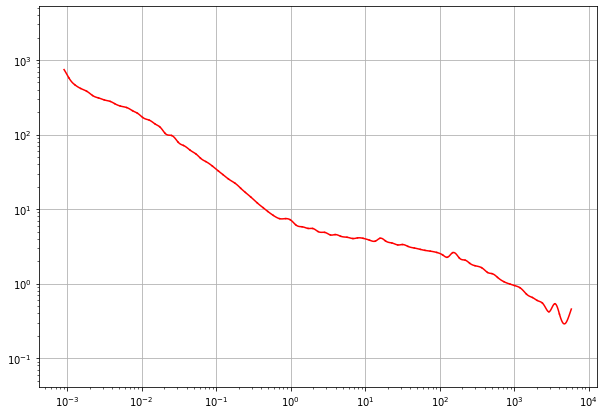

In [25]:
# строим мой сплайн без крит3
spline(period_exp_nan, zxy_exp_gm)

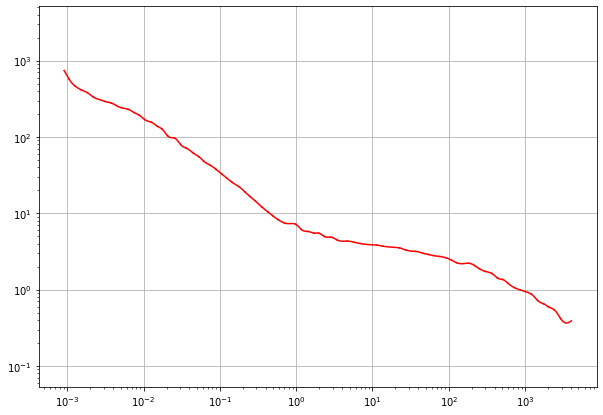

In [26]:
# строим мой сплайн с крит3
spline(period_exp_cr3, zxy_exp_gm_cr3)

In [27]:
print(len(period_exp_nan), len(period_exp_cr3))

90 80


In [36]:
#
rhoxy_exp = open_exp_data('OO-01_REH — копия.edi', '>RHOXY NFREQ=90 ROT=RHOROT // 90')
rhoxy_exp_not32 = big_filtr(rhoxy_exp)
bln_msk_nan_rhoxy_exp, good_rhoxy_exp = bln_mask_nan(rhoxy_exp_not32)

In [37]:
#
bln_rhoxy_exp = one_bln_from_two(bln_msk_nan_rhoxy_exp, bln_msk_non_incr_zxy_exp)

In [38]:
period_cr3 = period_exp[bln_rhoxy_exp]
rhoxy_exp_cr3 = geom_mean(good_rhoxy_exp)[bln_msk_non_incr_zxy_exp]


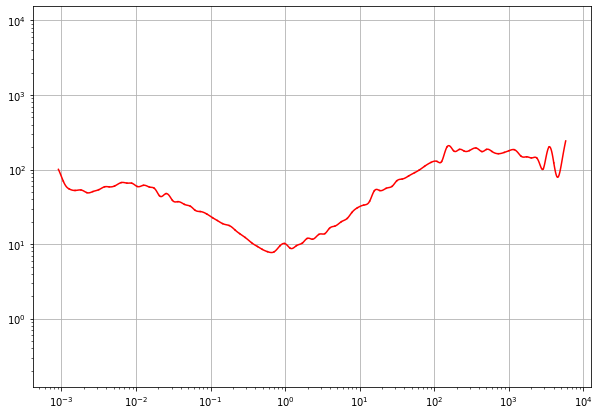

In [39]:
spline(period_exp[bln_msk_nan_rhoxy_exp], geom_mean(good_rhoxy_exp))

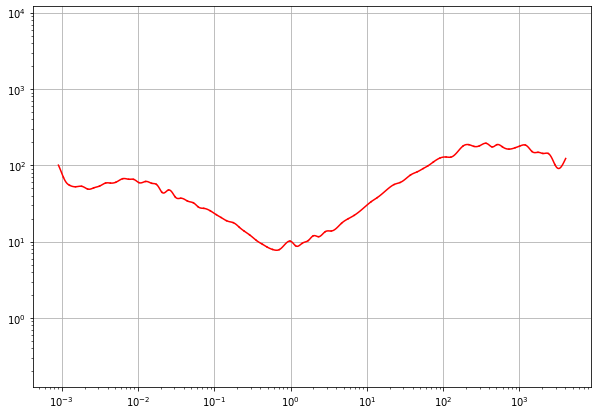

In [40]:
spline(period_cr3, rhoxy_exp_cr3)

In [41]:
rhoxy_exp_w = weig(good_rhoxy_exp)

In [42]:
# вытягияем и повторяем
n_rhoxy_exp, rhoxy_exp_flat = flat(good_rhoxy_exp)
#print(n_rhoxy_exp, rhoxy_exp_flat)
period_exp_rhoxy_rep = np.repeat(period_exp_nan, n_rhoxy_exp)
rhoxy_exp_w_rep = np.repeat(rhoxy_exp_w, n_rhoxy_exp)

In [43]:
def spline_matrix(good_period, good_data, bilog_scale = True, semilogx_scale = False, lin_scale = False):
    
    h = []
    n = len(good_period)
    for i in range(n - 1):
        h.append(good_period[i + 1] - good_period[i])
   
    A = np.zeros((n, n))
    H = np.zeros((n, n))
              
    for i in range(n):
        #P[i][i] = w[i]
        if i == 0 or i == n-1:
            A[i][i] = 1
        else:
            A[i][i] = (h[i-1] + h[i])/3
            H[i][i] = -(1/h[i-1] + 1/h[i])
            for j in range(n):
                if j == i - 1:
                    A[i][j] = h[j]/6
                    H[i][j] = 1/h[j]
                elif j == i + 1:
                    A[i][j] = h[i]/6
                    H[i][j] = 1/h[i]
                    break
    m = np.linalg.solve(A, np.dot(H, good_data))
    m = list(m)
    m.reverse()
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot()
    if bilog_scale == True:
        for i in range(1, n):
            x = np.linspace(good_period[i-1], good_period[i], 50)
            ax.loglog(x, ((m[-i] * (good_period[i] - x)**3 + m[-(i+1)] * (x - good_period[i-1])**3) / 6 + (good_data[i-1] - m[-i] * h[i - 1]**2 / 6) * (good_period[i] - x) + (good_data[i] - m[-(i+1)] * h[i - 1]**2 / 6) * (x - good_period[i-1])) / h[i - 1], color='red')
            ax.grid('True')
            ax.axis('equal')
    elif semilogx_scale == True:
        for i in range(1, n):
            x = np.linspace(good_period[i-1], good_period[i], 50)
            ax.semilogx(x, ((m[-i] * (good_period[i] - x)**3 + m[-(i+1)] * (x - good_period[i-1])**3) / 6 + (good_data[i-1] - m[-i] * h[i - 1]**2 / 6) * (good_period[i] - x) + (good_data[i] - m[-(i+1)] * h[i - 1]**2 / 6) * (x - good_period[i-1])) / h[i - 1], color='red')
            ax.grid('True')
    elif lin_scale == True:
        for i in range(1, n):
            x = np.linspace(good_period[i-1], good_period[i], 50)
            ax.plot(x, ((m[-i] * (good_period[i] - x)**3 + m[-(i+1)] * (x - good_period[i-1])**3) / 6 + (good_data[i-1] - m[-i] * h[i - 1]**2 / 6) * (good_period[i] - x) + (good_data[i] - m[-(i+1)] * h[i - 1]**2 / 6) * (x - good_period[i-1])) / h[i - 1], color='red')
            ax.grid('True')
            ax.axis('equal')
    ax.plot(good_period, good_data, 'o')
    plt.show()
    
    return A, H, m

In [44]:
def smoothing_spline(good_period, good_data, w, s=1, bilog_scale = True, semilogx_scale = False, lin_scale = False):
    h = []
    n = len(good_period)
    for i in range(n - 1):
        h.append(good_period[i + 1] - good_period[i])
    A = np.zeros((n, n))
    P = np.zeros((n, n))
    H = np.zeros((n, n))
              
    for i in range(n):
        P[i][i] = w[i]
        if i == 0 or i == n-1:
            A[i][i] = 1
        else:
            A[i][i] = (h[i-1] + h[i])/3
            H[i][i] = -(1/h[i-1] + 1/h[i])
            for j in range(n):
                if j == i - 1:
                    A[i][j] = h[j]/6
                    H[i][j] = 1/h[j]
                elif j == i + 1:
                    A[i][j] = h[i]/6
                    H[i][j] = 1/h[i]
                    break
        
    #print('A\n', A)
    #print(w)
    #print('P\n', P)
    #print(h)
    #print('H\n', H)
    P_inv = np.linalg.inv(P)
    H_t = np.transpose(H)
    #print(P_inv)
    #print(H_t)
    # (A + H * P_inv * H_t) * m = H * good_data
    m = np.linalg.solve(np.add(A, np.dot(np.dot(H, P_inv), s*H_t)), np.dot(H, good_data)) # n-1
    # mu = good_data - P_inv * H_t * m
    mu = np.subtract(good_data, np.dot(np.dot(P_inv, s*H_t), m)) # n
    
    m = list(m)
    m.reverse()
    #print(m)
    #print(n)
    #print(len(m))
    #print(len(mu))
    #print(len(w))
    #print(np.dot(H, P_inv))
    #print(np.dot(np.dot(H, P_inv), H_t))
    #print(np.add(A, np.dot(np.dot(H, P_inv), H_t)))
    #print(np.dot(H, good_data))
    #print(m)
    #print(w)
    print(mu)
    print(good_data)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot()
    if bilog_scale == True:
        for i in range(1, n):
            x = np.linspace(good_period[i-1], good_period[i], 50)
            ax.loglog(x, ((m[-i] * (good_period[i] - x)**3 + m[-(i+1)] * (x - good_period[i-1])**3) / 6 + (mu[i-1] - m[-i] * h[i - 1]**2 / 6) * (good_period[i] - x) + (mu[i] - m[-(i+1)] * h[i - 1]**2 / 6) * (x - good_period[i-1])) / h[i - 1], color='red')
            ax.grid('True')
            ax.axis('equal')
    elif semilogx_scale == True:
        for i in range(1, n):
            x = np.linspace(good_period[i-1], good_period[i], 50)
            ax.semilogx(x, ((m[-i] * (good_period[i] - x)**3 + m[-(i+1)] * (x - good_period[i-1])**3) / 6 + (mu[i-1] - m[-i] * h[i - 1]**2 / 6) * (good_period[i] - x) + (mu[i] - m[-(i+1)] * h[i - 1]**2 / 6) * (x - good_period[i-1])) / h[i - 1], color='red')
            ax.grid('True')
    elif lin_scale == True:
        for i in range(1, n):
            x = np.linspace(good_period[i-1], good_period[i], 50)
            ax.plot(x, ((m[-i] * (good_period[i] - x)**3 + m[-(i+1)] * (x - good_period[i-1])**3) / 6 + (mu[i-1] - m[-i] * h[i - 1]**2 / 6) * (good_period[i] - x) + (mu[i] - m[-(i+1)] * h[i - 1]**2 / 6) * (x - good_period[i-1])) / h[i - 1], color='red')
            ax.grid('True')
            ax.axis('equal')
    ax.plot(good_period, good_data, 'o')
    plt.show()

In [158]:
def spline_progonka(good_period, good_data):
    
    h = []
    n = len(good_period)
    for i in range(n - 1):
        h.append(good_period[i + 1] - good_period[i])
   
    a = [0]
    b = [-1]
    c = [0]
    d = [0]
    ksi = [c[0]/b[0]]
    etta = [d[0]/b[0]]
    for i in range(1, n - 1):
        a.append((h[i-1]/6))
        b.append((-(h[i-1] + h[i])/3))
        c.append(h[i]/6)
        d.append((good_data[i+1] - good_data[i])/h[i] - (good_data[i] - good_data[i-1])/h[i-1])
        ksi.append(c[i]/(b[i] - ksi[i-1] * a[i]))
        etta.append((a[i] * etta[i-1] - d[i])/(b[i] - ksi[i-1] * a[i]))
    a.append(0)
    b.append(-1)
    c.append(0)
    d.append(0)
    etta.append((a[n-1] * etta[n-2] - d[n-1])/(b[n-1] - ksi[n-2] * a[n-1]))
    
    m = [etta[n-1]]
    for i in range(1, n):
        m.append(ksi[-i] * m[i-1] + etta[-(i+1)])
    return m

In [157]:
def spline_matrix(good_period, good_data):
    
    h = []
    n = len(good_period)
    for i in range(n - 1):
        h.append(good_period[i + 1] - good_period[i])
   
    A = np.zeros((n, n))
    H = np.zeros((n, n))
              
    for i in range(n):
        if i == 0 or i == n-1:
            A[i][i] = 1
        else:
            A[i][i] = (h[i-1] + h[i])/3
            H[i][i] = -(1/h[i-1] + 1/h[i])
            for j in range(n):
                if j == i - 1:
                    A[i][j] = h[j]/6
                    H[i][j] = 1/h[j]
                elif j == i + 1:
                    A[i][j] = h[i]/6
                    H[i][j] = 1/h[i]
                    break
    m = np.linalg.solve(A, np.dot(H, good_data))
    return A, H, m

In [169]:
m_prgn = spline_progonka(period_exp[bln_msk_nan_rhoxy_exp], geom_mean(good_rhoxy_exp))
A_mx, H_mx, m_mx = spline_matrix(period_exp[bln_msk_nan_rhoxy_exp], geom_mean(good_rhoxy_exp))
m_gj_2 = gauss_jordan(A_mx, np.dot(H_mx, geom_mean(good_rhoxy_exp)))
print(m_gj_2)
print(m_mx)
m_prgn.reverse()
print(np.asarray(m_prgn, dtype = np.float32))

In [169]:
smoothing_spline_mine(period_exp[bln_msk_nan_rhoxy_exp], geom_mean(good_rhoxy_exp)), rhoxy_exp_w[bln_msk_non_incr_zxy_exp], s = 1e-5)

[ 0.00000000e+00  1.11539738e+09  1.20683796e+08  6.68719087e+07
 -1.00728670e+08  8.44947146e+07 -1.83814325e+07  1.80344910e+07
 -2.69855576e+07  8.03706141e+06  7.65904995e+06 -1.14633667e+07
  5.50761517e+06 -7.09126603e+06  6.13700594e+06 -3.28741050e+06
  1.82362717e+06 -2.78542318e+06  2.71844806e+06 -1.48808402e+06
  7.71639361e+05 -2.02123929e+05  9.59504590e+04 -8.32373880e+04
  7.29361957e+04 -1.54779701e+04 -4.90713517e+02  4.14120821e+03
  1.20461791e+01  3.69351055e+03 -2.59501172e+03  1.21014346e+03
  3.75209609e+02 -1.54805379e+01  2.82560998e+02  3.83242417e+00
  8.41161538e+01  3.02244847e+01  1.38668409e+02 -6.63180034e+01
 -1.42109449e+02  1.08479297e+02 -3.44441347e+01  3.72479994e+01
 -4.88005576e+01  3.11876425e+01 -2.12278240e+01  2.01361952e+01
 -1.32373447e+01  5.09750605e+00 -3.14917195e+00  4.54959659e+00
 -2.43013402e+00 -5.94739018e-01 -7.11050066e-01  4.79771492e+00
 -5.44922632e+00  1.63173218e+00 -6.87432931e-01  9.93857956e-01
 -8.38829489e-01  2.25860

In [54]:
def smoothing_spline_mine(good_period, good_data, w, s=1, bilog_scale = True, semilogx_scale = False, lin_scale = False):
    h = []
    n = len(good_period)
    for i in range(n - 1):
        h.append(good_period[i + 1] - good_period[i])
    A = np.zeros((n, n))
    P = np.zeros((n, n))
    H = np.zeros((n, n))
              
    for i in range(n):
        P[i][i] = w[i]
        if i == 0 or i == n-1:
            A[i][i] = 1
        else:
            A[i][i] = (h[i-1] + h[i])/3
            H[i][i] = -(1/h[i-1] + 1/h[i])
            for j in range(n):
                if j == i - 1:
                    A[i][j] = h[j]/6
                    H[i][j] = 1/h[j]
                elif j == i + 1:
                    A[i][j] = h[i]/6
                    H[i][j] = 1/h[i]
                    break
    #print(H.shape)
    #print(H[1][0], H[n-2][n-1])
    P_inv = np.linalg.inv(P)
    H_t = np.transpose(H)
    A_t = np.transpose(A)
    A_inv = np.linalg.inv(A)

    # (1/2*H*P_inv*(H + A_t*A_inv*H) + A) * m = H * good_data
    m = np.linalg.solve(np.add(np.dot(np.dot(s/2 * H, P_inv), np.add(H, np.dot(np.dot(A_t, A_inv), H))), A), np.dot(H, good_data)) # n-1
    # mu = good_data - P_inv * (H + A_t*A_inv*H) * m
    mu = np.subtract(good_data, np.dot(np.dot(s/2 * P_inv, np.add(H, np.dot(np.dot(A_t, A_inv), H))), m)) # n
    
    m = list(m)
    m.reverse()
    #print(mu)
    #print(good_data)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot()
    if bilog_scale == True:
        for i in range(1, n):
            x = np.linspace(good_period[i-1], good_period[i], 50)
            ax.loglog(x, ((m[-i] * (good_period[i] - x)**3 + m[-(i+1)] * (x - good_period[i-1])**3) / 6 + (mu[i-1] - m[-i] * h[i - 1]**2 / 6) * (good_period[i] - x) + (mu[i] - m[-(i+1)] * h[i - 1]**2 / 6) * (x - good_period[i-1])) / h[i - 1], color='red')
            ax.grid('True')
            ax.axis('equal')
    elif semilogx_scale == True:
        for i in range(1, n):
            x = np.linspace(good_period[i-1], good_period[i], 50)
            ax.semilogx(x, ((m[-i] * (good_period[i] - x)**3 + m[-(i+1)] * (x - good_period[i-1])**3) / 6 + (mu[i-1] - m[-i] * h[i - 1]**2 / 6) * (good_period[i] - x) + (mu[i] - m[-(i+1)] * h[i - 1]**2 / 6) * (x - good_period[i-1])) / h[i - 1], color='red')
            ax.grid('True')
    elif lin_scale == True:
        for i in range(1, n):
            x = np.linspace(good_period[i-1], good_period[i], 50)
            ax.plot(x, ((m[-i] * (good_period[i] - x)**3 + m[-(i+1)] * (x - good_period[i-1])**3) / 6 + (mu[i-1] - m[-i] * h[i - 1]**2 / 6) * (good_period[i] - x) + (mu[i] - m[-(i+1)] * h[i - 1]**2 / 6) * (x - good_period[i-1])) / h[i - 1], color='red')
            ax.grid('True')
            ax.axis('equal')
    #ax.plot(good_period, good_data, 'o')
    plt.show()

[6.17408398e+02 6.13384201e+02 6.07591142e+02 6.00617521e+02
 5.92332342e+02 5.82269621e+02 5.70307252e+02 5.56252942e+02
 5.39238480e+02 5.23629348e+02 5.02551606e+02 4.72622951e+02
 4.40662709e+02 4.11921816e+02 3.74456888e+02 3.23931506e+02
 2.73763749e+02 2.32660658e+02 1.84831074e+02 1.31106303e+02
 8.67721936e+01 6.08445724e+01 4.46979654e+01 4.14526353e+01
 4.21496721e+01 4.21330598e+01 3.85097260e+01 3.31377837e+01
 2.91012071e+01 2.52952884e+01 2.15552252e+01 1.87173833e+01
 1.67021346e+01 1.44983862e+01 1.21085901e+01 1.04232553e+01
 9.29791823e+00 8.24226496e+00 7.43608396e+00 7.14697249e+00
 6.17750567e+00 5.78391062e+00 5.50619228e+00 5.48532529e+00
 4.99620114e+00 4.86926816e+00 4.49529104e+00 4.32591256e+00
 4.18749753e+00 4.02558279e+00 3.82879686e+00 3.71578269e+00
 3.50909686e+00 3.30449605e+00 3.16422844e+00 3.00278044e+00
 2.88175631e+00 2.79416442e+00 2.72581553e+00 2.61876297e+00
 2.42646432e+00 2.25412750e+00 2.21738982e+00 2.06527209e+00
 1.87593365e+00 1.737690

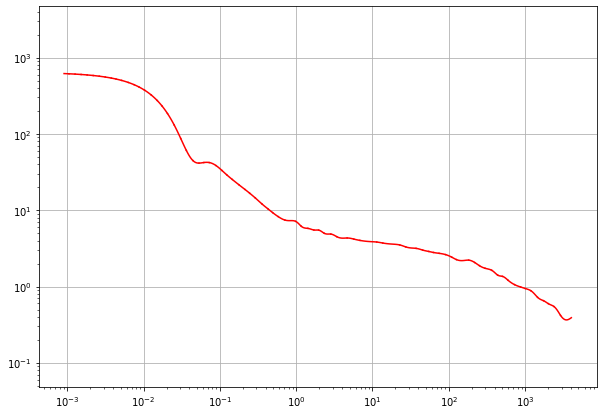

In [53]:
smoothing_spline_mine(period_exp_cr3, zxy_exp_gm_cr3, zxy_exp_w[bln_msk_non_incr_zxy_exp], s = 1e-5)

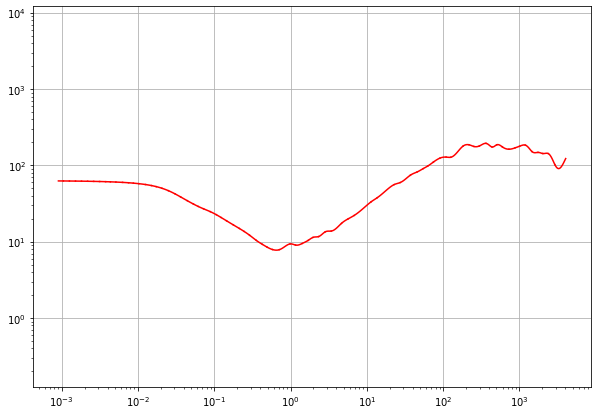

In [55]:
smoothing_spline_mine(period_exp_cr3, rhoxy_exp_cr3, rhoxy_exp_w[bln_msk_non_incr_zxy_exp], s = 1e-5)

In [301]:
def smoothing_spline_mine_2(good_period, good_data, w, s=1, bilog_scale = True, semilogx_scale = False, lin_scale = False):
    h = []
    n = len(good_period)
    for i in range(n - 1):
        h.append(good_period[i + 1] - good_period[i])
    A = np.zeros((n, n))
    P = np.zeros((n, n))
    H = np.zeros((n, n))
              
    for i in range(n):
        P[i][i] = w[i]
        if i == 0 or i == n-1:
            A[i][i] = 1
        else:
            A[i][i] = (h[i-1] + h[i])/3
            H[i][i] = -(1/h[i-1] + 1/h[i])
            for j in range(n):
                if j == i - 1:
                    A[i][j] = h[j]/6
                    H[i][j] = 1/h[j]
                elif j == i + 1:
                    A[i][j] = h[i]/6
                    H[i][j] = 1/h[i]
                    break
    print(H.shape)
    print(H[1][0], H[n-2][n-1])
    P_inv = np.linalg.inv(P)
    H_t = np.transpose(H)
    A_t = np.transpose(A)
    A_inv = np.linalg.inv(A)

    # (1/2*H*P_inv*(H + A_t*A_inv*H) + A) * m = H * good_data
    m = np.linalg.solve(np.add(np.dot(np.dot(1/(2*s) * H, P_inv), np.add(H, np.dot(np.dot(A_t, A_inv), H))), A), np.dot(H, good_data)) # n-1
    # mu = good_data - P_inv * (H + A_t*A_inv*H) * m
    mu = np.subtract(good_data, np.dot(np.dot(1/(2*s) * P_inv, np.add(H, np.dot(np.dot(A_t, A_inv), H))), m)) # n
    
    m = list(m)
    m.reverse()
    print(mu)
    print(good_data)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot()
    ax.plot(good_period, good_data, 'o')
    if bilog_scale == True:
        for i in range(1, n):
            x = np.linspace(good_period[i-1], good_period[i], 50)
            ax.loglog(x, ((m[-i] * (good_period[i] - x)**3 + m[-(i+1)] * (x - good_period[i-1])**3) / 6 + (mu[i-1] - m[-i] * h[i - 1]**2 / 6) * (good_period[i] - x) + (mu[i] - m[-(i+1)] * h[i - 1]**2 / 6) * (x - good_period[i-1])) / h[i - 1], color='red')
            ax.grid('True')
            ax.axis('equal')
    elif semilogx_scale == True:
        for i in range(1, n):
            x = np.linspace(good_period[i-1], good_period[i], 50)
            ax.semilogx(x, ((m[-i] * (good_period[i] - x)**3 + m[-(i+1)] * (x - good_period[i-1])**3) / 6 + (mu[i-1] - m[-i] * h[i - 1]**2 / 6) * (good_period[i] - x) + (mu[i] - m[-(i+1)] * h[i - 1]**2 / 6) * (x - good_period[i-1])) / h[i - 1], color='red')
            ax.grid('True')
    elif lin_scale == True:
        for i in range(1, n):
            x = np.linspace(good_period[i-1], good_period[i], 50)
            ax.plot(x, ((m[-i] * (good_period[i] - x)**3 + m[-(i+1)] * (x - good_period[i-1])**3) / 6 + (mu[i-1] - m[-i] * h[i - 1]**2 / 6) * (good_period[i] - x) + (mu[i] - m[-(i+1)] * h[i - 1]**2 / 6) * (x - good_period[i-1])) / h[i - 1], color='red')
            ax.grid('True')
            ax.axis('equal')
    plt.show()

(80, 80)
6808.495221533397 0.0008933724241931185
[ 62.66442701  62.59318726  62.49060194  62.36700097  62.21989005
  62.04064122  61.82640113  61.57253338  61.26103873  60.97010898
  60.56721646  59.96928494  59.28672721  58.6243671   57.67634369
  56.20816505  54.46384637  52.74390204  50.27562225  46.61541756
  42.33406703  38.63256295  34.48644045  31.24011371  29.06341054
  26.98812983  24.79145207  22.60476507  20.79464502  18.79024824
  16.64860746  14.94141492  13.66889317  12.17580616  10.43507315
   9.26549512   8.51253514   7.90530893   7.86684996   9.36424473
   9.05311547   9.49323827  10.43910553  11.39879682  11.68185222
  13.46740292  13.80218171  17.41842602  19.95058019  22.12663724
  33.35888882  37.70456604  56.04373032  59.63632162  74.56702514
  82.07914127  90.70558701  98.40159252 110.68482933 124.83738616
 128.6181178  128.06791879 179.01335671 186.36518583 177.40695947
 179.89937179 194.68134417 174.45883598 186.29911695 175.05638139
 163.16932678 169.84587096 

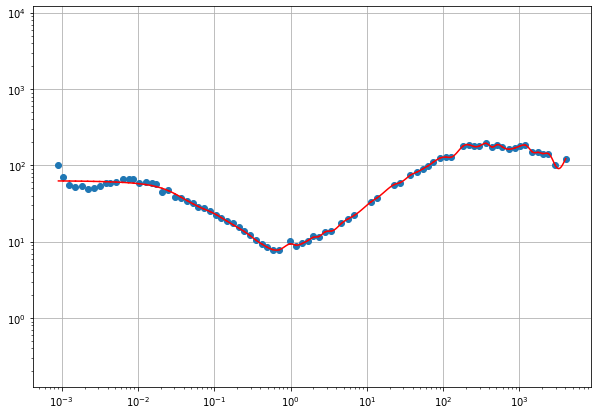

In [307]:
smoothing_spline_mine_2(period_exp_cr3, rhoxy_exp_cr3, rhoxy_exp_w[bln_msk_non_incr_zxy_exp], s = 1e5)